In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('resume.csv')

In [11]:
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [12]:
df.shape

(962, 2)

In [13]:
cat=df['Category'].value_counts()

In [14]:
cat

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


<Axes: xlabel='Category'>

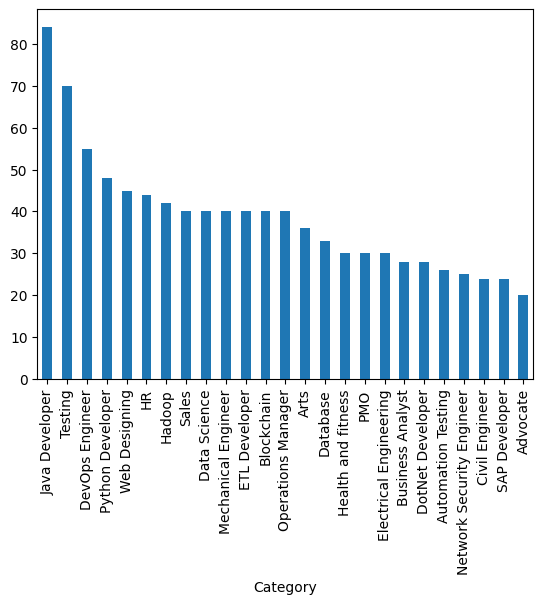

In [15]:
cat.plot(kind='bar')

Data Cleaning

In [16]:
from nltk.corpus import stopwords
import re

def clean(text):
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove numbers and special characters except spaces
    text = re.sub(r'-', '', text) # remove hypens
    text = re.sub(r'http\S+', '', text)# remove urls
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower() # convert to lower case
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return " ".join(words)


In [17]:
df['resume']=df['Resume'].apply(clean)

In [20]:
df.drop(columns=['Resume'],inplace=True)

In [21]:
df

,Category,resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may may uitrgpv data scienti...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills proficient ms office word basi...
958,Testing,willingness accept challenges positive thinkin...
959,Testing,personal skills quick learner eagerness learn ...
960,Testing,computer skills software knowledge mspower poi...


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [26]:
df

,Category,resume
0,6,skills programming languages python pandas num...
1,6,education details may may uitrgpv data scienti...
2,6,areas interest deep learning control system de...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...
...,...,...
957,23,computer skills proficient ms office word basi...
958,23,willingness accept challenges positive thinkin...
959,23,personal skills quick learner eagerness learn ...
960,23,computer skills software knowledge mspower poi...


In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
cv=cv.fit(df['resume'])
cv_matrix=cv.transform(df['resume'])

In [86]:
cv

CountVectorizer(stop_words='english')

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cv_matrix,df['Category'],test_size=0.2,random_state=42)

In [88]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 7477)
(193, 7477)
(769,)
(193,)


In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


0.9585492227979274


In [90]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9844559585492227


In [91]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9948186528497409


In [77]:
from sklearn.multiclass import OneVsRestClassifier
model_m=OneVsRestClassifier(SVC(kernel='linear'))
model_m.fit(x_train,y_train) # Changed 'model' to 'model_m' to fit the correct model
y_pred=model_m.predict(x_test) # Changed 'model' to 'model_m' for prediction
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9948186528497409


In [92]:
import pickle
pickle.dump(le,open('label.pkl','wb'))
pickle.dump(model_m,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [79]:
resume='html python css sql'

In [81]:
import pickle
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the saved model, label encoder, and TF-IDF vectorizer
model = pickle.load(open('model.pkl', 'rb'))
le = pickle.load(open('label.pkl', 'rb'))
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

# Function to clean the input resume text
def clean(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'-', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return " ".join(words)

# Example resume text
resume = 'html python css sql'

# Clean the resume
cleaned_resume = clean(resume)

# Transform the cleaned resume using the loaded TF-IDF vectorizer
tfidf_matrix = tfidf.transform([cleaned_resume])


# Make predictions using the loaded model
prediction = model.predict(tfidf_matrix)

# Inverse transform the prediction to get the category label
predicted_category = le.inverse_transform(prediction)[0]

# Print the predicted category
predicted_category


'Python Developer'